In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('/content/drive/MyDrive/CS506/CS506_FINAL/cleaned_weather_data.csv')
df.head()

,weather_code,max_temp,min_temp,mean_temp,snowfall_sum (cm),precipitation_hours (h),wind_speed_10m_max (mp/h),range_temp,LA,Boston,Chicago,Year,Phase_encoded
0,0,74.3,50.0,61.4,0.0,0,9.0,24.3,1,0,0,2019,2
1,0,76.2,49.1,61.4,0.0,0,7.7,27.1,1,0,0,2019,2
2,0,77.7,42.6,58.3,0.0,0,9.6,35.1,1,0,0,2019,2
3,0,81.8,49.1,62.8,0.0,0,7.4,32.7,1,0,0,2019,2
4,2,84.5,56.9,66.8,0.0,0,7.5,27.6,1,0,0,2019,2


## Preliminary Analysis

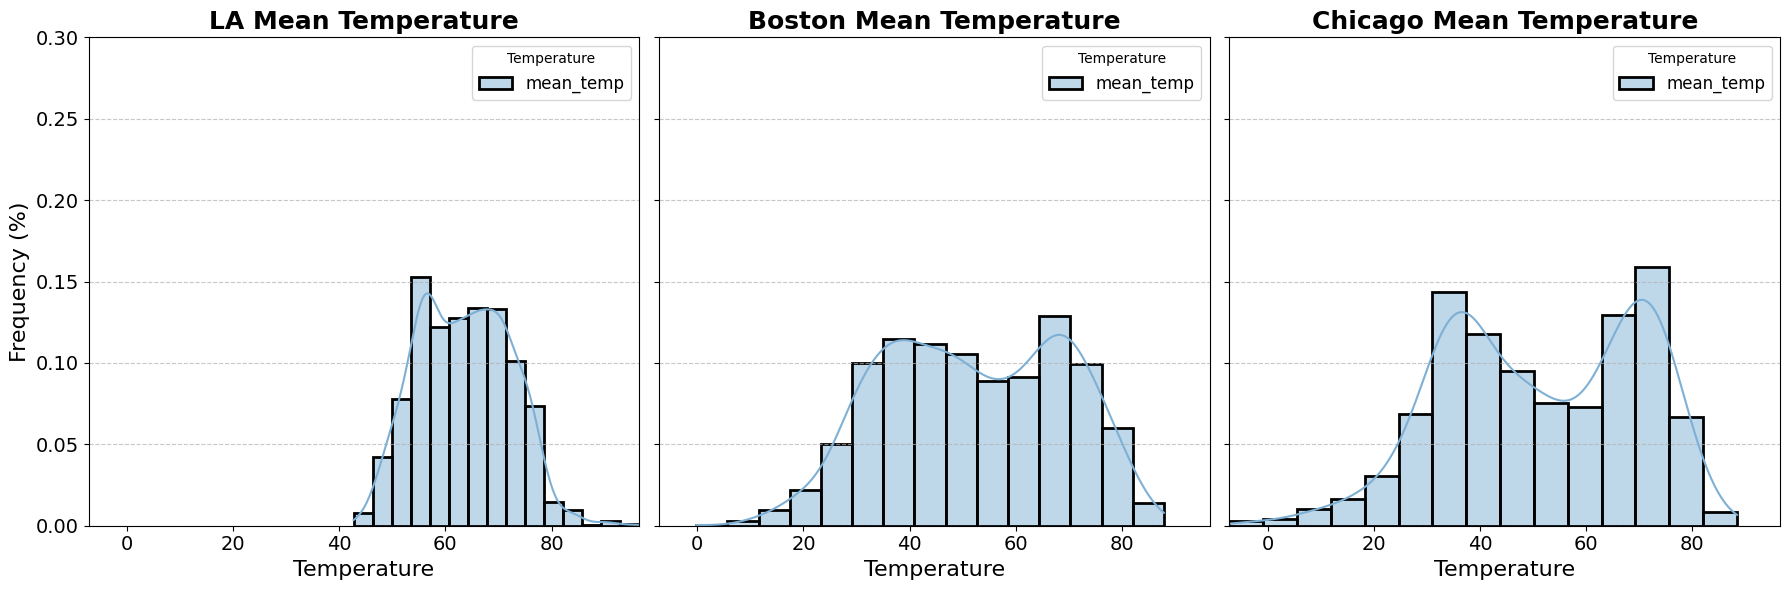

In [24]:
cities = ['LA', 'Boston', 'Chicago']
temp_column = 'mean_temp'  # Focus on mean_temp only

# Find global min and max temperatures across all cities
global_min_temp = df['mean_temp'].min()
global_max_temp = df['mean_temp'].max()

# Set up a 1x3 grid for the subplots (side-by-side)
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Define color for the mean temperature
mean_temp_color = '#7eb0d5'

# Loop through the cities and plot the histograms for mean_temp only
for i, city in enumerate(cities):
    # Filter the data for the current city
    city_data = df[df[city] == 1]  # Assuming one-hot encoding with 1 for the respective city

    # Plot the histogram for mean_temp
    sns.histplot(city_data[temp_column], kde=True, label=temp_column, ax=axes[i], bins=15, stat="probability", color=mean_temp_color, linewidth=2)

    # Set the title and labels with larger font size and bold title
    axes[i].set_title(f'{city} Mean Temperature', fontsize=18, fontweight='bold')
    axes[i].set_xlabel('Temperature', fontsize=16)
    axes[i].set_ylabel('Frequency (%)', fontsize=16)

    # Customize the ticks and grids
    axes[i].tick_params(axis='both', labelsize=14)
    axes[i].yaxis.grid(True, linestyle='--', alpha=0.7)

    # Normalize y-axis to be in percentage format and cap it at 0.3
    axes[i].set_ylim(0, 0.3)

    # Set the x-axis temperature range to be the same across all plots
    axes[i].set_xlim(global_min_temp, global_max_temp)

    # Add a legend in the top-right corner
    axes[i].legend(title='Temperature', fontsize=12, loc='upper right')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

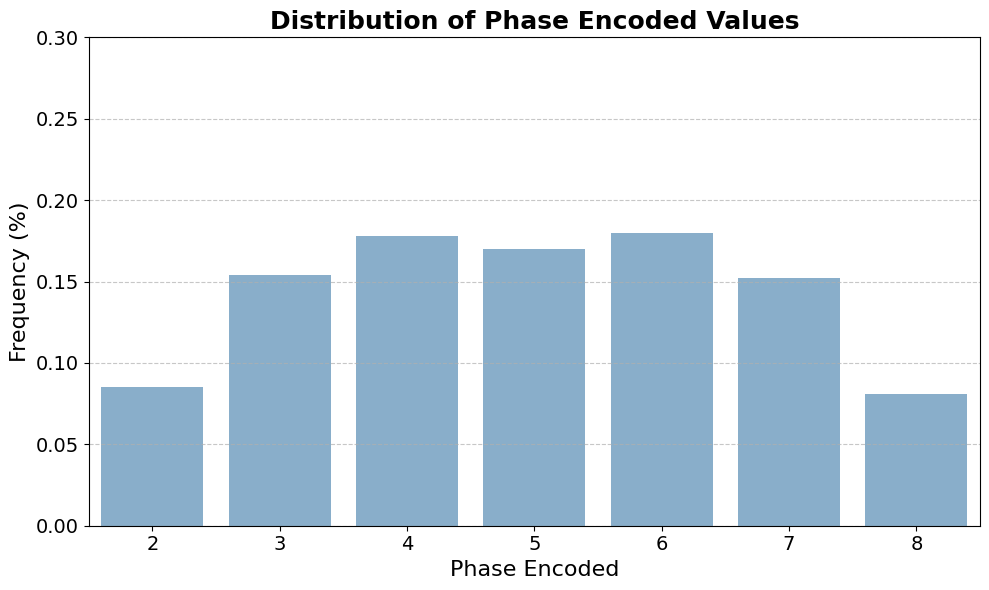

In [23]:
plt.figure(figsize=(10, 6))

# Create a countplot with normalized frequency (percent) for phase_encoded
sns.countplot(x='Phase_encoded', data=df, color='#7eb0d5',
              stat='probability')

# Set the title and labels with larger font size and bold title
plt.title('Distribution of Phase Encoded Values', fontsize=18, fontweight='bold')
plt.xlabel('Phase Encoded', fontsize=16)
plt.ylabel('Frequency (%)', fontsize=16)

# Customize the ticks and grids
plt.tick_params(axis='both', labelsize=14)
plt.grid(True, linestyle='--', alpha=0.7, axis='y')  # Only horizontal gridlines

# Display y-axis as percentage
plt.gca().set_ylim(0, 0.3)

# Show the plot
plt.tight_layout()
plt.show()
